# Level 1

Process of the experiment that being conducted : 

> 1) Single classifier (Base Learner 1) : ID3 
>> 2) Filtering the data (True Negative + False Negative)
>>> 3) Then proceed to Level 2 (stacking) 



In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from statistics import mean, stdev
import seaborn as sns
import matplotlib.gridspec as gridspec


## Import libraries for Classifiers

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
# Load CSV

df = pd.read_csv('/Users/User/Desktop/CCFD_.csv')


In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Classifier Level 1

Base Leaner 1 : ID3

StratifiedKFold(n_splits = 5)

In [4]:
# # Classifier ID3

layer_one_final = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 2, ccp_alpha = 0.0005)



In [5]:

X1 = df.drop(['Class'],axis=1) #features
y = df['Class'] #target


skf1 = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)
level_one_skf1 = []
level_one_predict_proba1 = []
level_one_predict_proba0 = []
level_one_predict = []
level_one_predict1 = []
level_one_predict2 = []
level_one_predict3 = []
level_one_predict4 = []
cm_holder = []
cf_holder = []



for train_index, test_index in skf1.split(X1, y):
    X1_train, y_train = X1.iloc[train_index], y.iloc[train_index]
    X1_test, y_test = X1.iloc[test_index], y.iloc[test_index]
    
    layer_one_final.fit(X1_train, y_train)
    
    level_one_skf1.append(layer_one_final.score(X1_test, y_test)) 
    level_one_predict_proba1.append(layer_one_final.predict_proba(X1_test)[:,1])
    level_one_predict_proba0.append(layer_one_final.predict_proba(X1_test)[:,0])
    
    pred = layer_one_final.predict(X1_test)
    level_one_predict.append(pred)
    
    cm_holder.append(confusion_matrix(y_test, layer_one_final.predict(X1_test))) #cf
    cf_holder.append(classification_report(y_test, layer_one_final.predict(X1_test))) #cr
    
    level_one_predict1.append(X1_test[(y_test == 1) & (pred==0)]) #FN #df1
    level_one_predict2.append(X1_test[(y_test == 1) & (pred==1)]) #TP #df2
    level_one_predict3.append(X1_test[(y_test == 0) & (pred==0)]) #TN #df3
    level_one_predict4.append(X1_test[(y_test == 0) & (pred==1)]) #FP #df4
    

In [6]:
print("Confusion Matrix : ", sum(cm_holder))

Confusion Matrix :  [[284205    110]
 [   122    370]]


In [7]:
cnf_matrix = sum(cm_holder)

print("TP",cnf_matrix[1,1]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predicted normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
print("TPR (1) : ", cnf_matrix[1,1]/(cnf_matrix[1,1]+ cnf_matrix[1,0]))
print("FPR (1) : ", cnf_matrix[0,1]/(cnf_matrix[0,1] + cnf_matrix[0,0]))
print("TPR (0) : ", cnf_matrix[0,0]/(cnf_matrix[0,1]+ cnf_matrix[0,0]))
print("FPR (0) : ", cnf_matrix[1,0]/(cnf_matrix[1,1] + cnf_matrix[1,0]))

TP 370
TN 284205
FP 110
FN 122
TPR (1) :  0.7520325203252033
FPR (1) :  0.00038689481736806005
TPR (0) :  0.9996131051826319
FPR (0) :  0.24796747967479674


## Filtering Data


df1 : False Negative (FN) : no of fraud transaction which are predicted normal

df2 : True Positive (TP)  : no of fraud transaction which are predicted fraud

df3 : True Negative (TN)  : no. of normal transaction which are predited normal

df4 : False Positive (FP) : no of normal transaction which are predicted fraud


df9 : data for all predicted as 0 / normal : FN (df5) + TN (df7) : to be used in Level 2

In [8]:
#for False Negative (FN) data  #df1

df1 = pd.DataFrame((level_one_predict1[0].append(level_one_predict1[1:10])))


df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
10484,17187.0,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,-0.217358,-0.423554,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,3.79
10497,17220.0,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-0.143435,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,3.79
10498,17230.0,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,...,-0.358709,0.159387,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,3.93
14104,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.185455,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274382,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,2.493224,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00
274475,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.190877,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90
275992,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,0.033804,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30
276071,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.037438,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95


In [9]:
#for True Positive (TP) data  #df2

df2 = pd.DataFrame((level_one_predict2[0].append(level_one_predict2[1:10])))


df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,0.650196,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89


In [10]:
#for True Negative (TN) data  #df3

df3 = pd.DataFrame((level_one_predict3[0].append(level_one_predict3[1:10])))


df3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [11]:
#for False Positive (FP) data  #df4

df4 = pd.DataFrame((level_one_predict4[0].append(level_one_predict4[1:10])))


df4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
460,339.0,0.503302,0.930065,-0.857525,2.042940,-1.505946,-1.000185,-1.991363,0.460577,-1.124101,...,0.166741,0.379925,-0.062191,-0.012187,0.479788,0.531947,-0.441323,0.460792,0.219985,2.00
472,347.0,-1.531271,1.399621,-0.587061,2.175002,-2.137637,-0.501576,-1.215215,0.956862,-1.866561,...,0.805862,0.557904,0.085267,0.403096,0.454438,0.202522,-0.313118,0.527182,0.202575,204.03
2016,1557.0,-1.967159,2.764458,1.083125,-0.904855,2.767055,-0.366271,4.648472,-4.208846,5.647693,...,3.815201,-1.419582,0.612482,-0.611963,-0.494140,-0.151419,-0.824974,-0.785974,-2.909294,3.99
4895,4429.0,-5.043472,4.015914,1.999942,-3.470182,1.755487,-0.376547,4.163343,-4.054582,9.272376,...,5.006974,-2.085362,-0.377101,-0.497721,-0.129580,0.594289,0.243699,-0.131943,-2.501568,0.77
8464,11347.0,1.261630,2.797779,-5.458663,3.844880,5.435051,1.844395,1.203394,0.323753,-1.416101,...,0.104955,-0.398609,-0.972494,-0.592696,0.280911,1.572414,0.491744,-0.025573,0.152650,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16
276061,166878.0,-0.852167,3.636906,-2.758497,3.276178,3.552849,-1.856120,2.317366,-0.263919,-2.969243,...,0.110391,-0.206770,-0.548317,-0.587916,-0.689512,0.458496,0.024388,0.254203,0.350211,0.77
277737,167826.0,-6.629470,2.872588,-4.817947,0.799106,-2.842538,-1.941351,-4.609837,2.130611,-1.582576,...,-1.622647,1.903358,0.551154,-0.621414,0.086836,0.233894,-0.256196,-1.861764,0.261256,1.00
277772,167846.0,-6.595915,3.303062,-5.993793,1.149137,-3.747111,-1.744032,-4.605288,2.507996,-1.427849,...,-1.588040,2.005201,1.003597,0.529591,0.045122,-0.618878,-0.334612,-1.759107,0.357327,1.99


In [12]:
# assigning 'Class' & 'Predicted' column to each dataset 

df5 = df1.assign(Class='1', Predicted='0') #FN
df6 = df2.assign(Class='1', Predicted='1') #TP
df7 = df3.assign(Class='0', Predicted='0') #TN
df8 = df4.assign(Class='0', Predicted='1') #FP

In [13]:
#data for all predicted as 0 / normal >> False Negative (df5) + True Negative (df7) >> to be used in Level 2

df9 = pd.concat([df5.reset_index(drop='True'),df7.reset_index(drop='True')])

df9

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0
1,17187.0,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,3.79,1,0
2,17220.0,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,3.79,1,0
3,17230.0,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,...,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,3.93,1,0
4,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284200,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0
284201,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0
284202,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284203,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0


In [14]:
#save file --> Level 1

df1.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df1_k5_withoutnorm.csv', index=False)
df2.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df2_k5_withoutnorm.csv', index=False)
df3.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df3_k5_withoutnorm.csv', index=False)
df4.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df4_k5_withoutnorm.csv', index=False)
df5.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df5_k5_withoutnorm.csv', index=False)
df6.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df6_k5_withoutnorm.csv', index=False)
df7.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df7_k5_withoutnorm.csv', index=False)
df8.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df8_k5_withoutnorm.csv', index=False)
df9.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df9_k5_withoutnorm.csv', index=False)


df1.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df1_k5_withoutnorm.xlsx')
df2.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df2_k5_withoutnorm.xlsx')
df3.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df3_k5_withoutnorm.xlsx')
df4.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df4_k5_withoutnorm.xlsx')
df5.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df5_k5_withoutnorm.xlsx')
df6.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df6_k5_withoutnorm.xlsx')
df7.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df7_k5_withoutnorm.xlsx')
df8.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df8_k5_withoutnorm.xlsx')
df9.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df9_k5_withoutnorm.xlsx')

# Level 2

 
> 1) Classifiers used are MLP (Base Learner 2), Random Forest (Base Learner 3) 
>> 2) These 2 classifers will be stack with Meta-Classifier; NB


StratifiedKFold(n_splits = 5)

In [15]:
df10 = pd.read_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df9_k5_withoutnorm.csv')

In [16]:
df10

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0
1,17187.0,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,3.79,1,0
2,17220.0,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,3.79,1,0
3,17230.0,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,...,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,3.93,1,0
4,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284322,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0
284323,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0
284324,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284325,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0


In [17]:
#Classifier MLP, RF, Meta - NB

layer_two = [('mlp', MLPClassifier(shuffle=False)),
             ('rf', RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42,
                                           max_features = 'auto', max_depth = 10)), ]



layer_two_final = StackingClassifier(estimators=layer_two, final_estimator= GaussianNB())



In [18]:
#df10 >> False Negative + True Negative (all that predicted as NO/normal) (total FN+TN = 284327). 

X2 = df10.drop(['Class', 'Predicted'],axis=1) #features
y2 = df10['Class'] #target



skf2 = StratifiedKFold(n_splits = 5, shuffle = False, random_state = None)
level_two_skf2 = []
level_two_predict_proba1 = []
level_two_predict_proba0 = []
level_two_predict = []
level_two_predict1 = []
level_two_predict2 = []
level_two_predict3 = []
level_two_predict4 = []
cm2_holder = []
cf2_holder = []



for train2_index, test2_index in skf2.split(X2, y2):
    X2_train, y2_train = X2.iloc[train2_index], y2.iloc[train2_index]
    X2_test, y2_test = X2.iloc[test2_index], y2.iloc[test2_index]
    layer_two_final.fit(X2_train, y2_train)
    
    level_two_skf2.append(layer_two_final.score(X2_test, y2_test))
    
    pred2 = layer_two_final.predict(X2_test)
    
    level_two_predict.append(pred2)
    
    level_two_predict1.append(X2_test[(y2_test == 1) & (pred2==0)]) #FN
    level_two_predict2.append(X2_test[(y2_test == 1) & (pred2==1)]) #TP
    level_two_predict3.append(X2_test[(y2_test == 0) & (pred2==0)]) #TN
    level_two_predict4.append(X2_test[(y2_test == 0) & (pred2==1)]) #FP 
    
    cm2_holder.append(confusion_matrix(y2_test, layer_two_final.predict(X2_test)))
    level_two_predict_proba1.append(layer_two_final.predict_proba(X2_test)[:,1])
    level_two_predict_proba0.append(layer_two_final.predict_proba(X2_test)[:,0])
    cf2_holder.append(classification_report(y2_test, layer_two_final.predict(X2_test)))
    

In [19]:
print("Confusion Matrix : ", sum(cm2_holder))

Confusion Matrix :  [[279734   4471]
 [    57     65]]


In [20]:
cnf2_matrix = sum(cm2_holder)

print("TP",cnf2_matrix[1,1]) # no of fraud transaction which are predicted fraud
print("TN",cnf2_matrix[0,0]) # no. of normal transaction which are predicted normal
print("FP",cnf2_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf2_matrix[1,0]) # no of fraud Transaction which are predicted normal
print("TPR (1) : ", cnf2_matrix[1,1]/(cnf2_matrix[1,1]+ cnf2_matrix[1,0]))
print("FPR (1) : ", cnf2_matrix[0,1]/(cnf2_matrix[0,1] + cnf2_matrix[0,0]))
print("TPR (0) : ", cnf2_matrix[0,0]/(cnf2_matrix[0,1]+ cnf2_matrix[0,0]))
print("FPR (0) : ", cnf2_matrix[1,0]/(cnf2_matrix[1,1] + cnf2_matrix[1,0]))

TP 65
TN 279734
FP 4471
FN 57
TPR (1) :  0.5327868852459017
FPR (1) :  0.015731602188561074
TPR (0) :  0.9842683978114389
FPR (0) :  0.4672131147540984


## Filtering Data (Level 2)


df11 : False Negative (FN) : no of fraud transaction which are predicted normal

df12 : True Positive (TP)  : no of fraud transaction which are predicted fraud

df13 : True Negative (TN)  : no. of normal transaction which are predited normal

df14 : False Positive (FP) : no of normal transaction which are predicted fraud


df19 : Combine all data (in level 2) with all predicted as 1/yes (FP[df8], TP[df6]) in level 1 to calculate final classification result

In [21]:
#for False Negative (FN) data  #df11

df11 = pd.DataFrame((level_two_predict1[0].append(level_two_predict1[1:10])))


df11

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
1,17187.0,1.088375,0.898474,0.394684,3.170258,0.175739,-0.221981,-0.022989,-0.010874,0.860044,...,-0.217358,-0.423554,-0.800852,0.077614,0.167608,0.350182,-0.118941,0.012948,0.054254,3.79
2,17220.0,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-0.143435,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,3.79
3,17230.0,-0.469327,1.111453,2.041003,1.731595,0.135147,-0.093625,0.266155,0.082988,0.580255,...,-0.358709,0.159387,0.592670,-0.053596,0.320748,-0.369121,-0.136605,-0.100845,0.039347,3.93
5,25426.0,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,...,-0.138814,-0.166737,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,3.76
6,30852.0,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,...,-1.016923,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,104.81
7,34521.0,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.165249,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52
8,35585.0,-2.019001,1.491270,0.005222,0.817253,0.973252,-0.639268,-0.974073,-3.146929,-0.003159,...,-1.029965,2.839596,-1.185443,-0.142812,-0.086103,-0.329113,0.523601,0.626283,0.152440,0.76
10,39729.0,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,1.784449,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83
13,44532.0,-0.234922,0.355413,1.972183,-1.255593,-0.681387,-0.665732,0.059110,-0.003153,1.122451,...,-0.003469,0.220670,0.912107,-0.286338,0.451208,0.188315,-0.531846,0.123185,0.039581,1.00


In [22]:
#for True Positive (TP) data  #df12

df12 = pd.DataFrame((level_two_predict2[0].append(level_two_predict2[1:10])))


df12

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
4,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.185455,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.12
9,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31
11,43028.0,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,...,0.168891,0.641594,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,204.27
12,43494.0,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.817203,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,24.90
15,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.221919,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,155542.0,1.868226,1.363077,-1.994934,4.173516,1.239751,-0.746186,0.572731,-0.131235,-1.551839,...,-0.172216,-0.301001,-0.818972,0.206812,-0.263683,-0.114958,-0.240672,-0.006629,0.017258,3.14
112,155548.0,1.878230,1.325630,-2.333469,4.233151,1.355184,-0.853508,0.716025,-0.164910,-1.502345,...,-0.226108,-0.152131,-0.360736,0.043414,-0.242380,0.171098,-0.002601,-0.026667,0.005238,7.06
116,165132.0,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,0.465512,...,-0.475126,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,12.31
118,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.190877,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90


In [23]:
#for True Negative (TN) data  #df13

df13 = pd.DataFrame((level_two_predict3[0].append(level_two_predict3[1:10])))


df13

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
122,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
123,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
124,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
125,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
126,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284322,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284323,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284324,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284325,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [24]:
#for False Positive (FP) data  #df14

df14 = pd.DataFrame((level_two_predict4[0].append(level_two_predict4[1:10])))


df14

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1750,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-11.748689,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43
3014,2440.0,-4.508547,5.050932,-2.114599,0.265771,1.263230,0.474670,-3.704011,-12.668590,0.344009,...,-2.574071,12.194849,-4.266839,0.500497,-0.100951,-0.265935,-0.472904,1.055836,0.504921,2.29
5286,4921.0,1.211804,1.470320,-1.209054,1.970963,0.705612,-2.074366,0.738571,-0.537067,0.707402,...,-0.055237,-0.318175,-0.543009,-0.139168,0.549016,0.784039,-0.368023,0.017804,0.097461,2.00
5540,5406.0,-8.733429,-5.681953,2.253879,3.930311,-0.916149,4.355297,5.400286,-4.994383,6.819787,...,-5.571503,-2.626882,1.525158,-1.428302,-0.030181,-0.029485,-0.264455,-7.976100,4.712560,553.60
5720,5769.0,1.185300,1.436782,-1.317515,1.869522,1.015100,-1.480824,0.671082,-0.398425,0.682084,...,-0.067197,-0.301999,-0.446670,-0.137094,0.037761,0.747115,-0.326223,0.035756,0.092291,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282423,171234.0,-16.224299,12.730564,-12.841065,-1.141867,-8.986583,-3.077067,-8.219623,10.713656,2.367518,...,1.285604,0.427780,0.263553,1.551892,-0.142470,1.436109,-0.035261,0.524327,0.882698,3.82
282790,171485.0,-1.285573,-0.476600,0.916088,5.109611,-2.323581,2.411584,1.038112,-2.747327,-2.360527,...,2.534408,-0.694043,0.759412,1.179777,-0.001235,1.375960,0.629582,-0.161460,0.266302,742.68
283664,172193.0,-1.045850,2.024365,-1.508737,-0.557827,1.705748,-2.251271,1.911448,-0.126141,-1.090551,...,-0.215417,0.190424,0.462549,-0.876697,-0.155998,1.747265,-0.121526,-0.130087,0.001125,8.00
283769,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44


In [25]:
# assigning 'Class' & 'Predicted' column to each dataset 

df15 = df11.assign(Class='1', Predicted='0') #FN
df16 = df12.assign(Class='1', Predicted='1') #TP
df17 = df13.assign(Class='0', Predicted='0') #TN
df18 = df14.assign(Class='0', Predicted='1') #FP


In [26]:
#combine all data (in level 2) with all predicted as 1/yes (FP[df8], TP[df6]) in level 1 
# >> to calculate final classification result 


df19 = pd.concat([df6.reset_index(drop='True'),df8.reset_index(drop='True'), df15.reset_index(drop='True'),
                 df16.reset_index(drop='True'), df17.reset_index(drop='True'), df18.reset_index(drop='True')])

df19

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,1
1,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,1
2,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,1
3,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,1
4,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,171234.0,-16.224299,12.730564,-12.841065,-1.141867,-8.986583,-3.077067,-8.219623,10.713656,2.367518,...,0.263553,1.551892,-0.142470,1.436109,-0.035261,0.524327,0.882698,3.82,0,1
4467,171485.0,-1.285573,-0.476600,0.916088,5.109611,-2.323581,2.411584,1.038112,-2.747327,-2.360527,...,0.759412,1.179777,-0.001235,1.375960,0.629582,-0.161460,0.266302,742.68,0,1
4468,172193.0,-1.045850,2.024365,-1.508737,-0.557827,1.705748,-2.251271,1.911448,-0.126141,-1.090551,...,0.462549,-0.876697,-0.155998,1.747265,-0.121526,-0.130087,0.001125,8.00,0,1
4469,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0,1


## Calculate Final Score

In [27]:

X3 = df19.drop(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10', 'V11', 'V12', 
                'V13', 'V14', 'V15', 'V16', 'V17', 'V18','V19', 'V20', 'V21', 'V22', 'V23', 'V24', 
                'V25', 'V26', 'V27', 'V28','Amount','Predicted'], axis=1) #Class/Actual

y3 = df19.drop(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10', 'V11', 
                'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 
                'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'], axis=1) #Predicted

In [28]:
cnf3_matrix = confusion_matrix(X3, y3)

print('confusion matrix:\n', cnf3_matrix)

confusion matrix:
 [[279734   4581]
 [    57    435]]


accuracy score:  0.983715287896716
ROC AUC: 0.9340169654664207
TP 435
TN 279734
FP 4581
FN 57
TPR (1) :  0.8841463414634146
FPR (1) :  0.016112410530573485
TPR (0) :  0.9838875894694266
FPR (0) :  0.11585365853658537


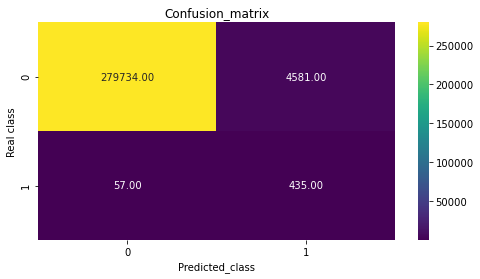


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.09      0.88      0.16       492

    accuracy                           0.98    284807
   macro avg       0.54      0.93      0.57    284807
weighted avg       1.00      0.98      0.99    284807



In [29]:

print("accuracy score: ", accuracy_score(X3, y3))
print("ROC AUC: {}".format(roc_auc_score(X3, y3)))
print("TP",cnf3_matrix[1,1]) # no of fraud transaction which are predicted fraud
print("TN",cnf3_matrix[0,0]) # no. of normal transaction which are predicted normal
print("FP",cnf3_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf3_matrix[1,0]) # no of fraud Transaction which are predicted normal
print("TPR (1) : ", cnf3_matrix[1,1]/(cnf3_matrix[1,1]+ cnf3_matrix[1,0]))
print("FPR (1) : ", cnf3_matrix[0,1]/(cnf3_matrix[0,1] + cnf3_matrix[0,0]))
print("TPR (0) : ", cnf3_matrix[0,0]/(cnf3_matrix[0,1]+ cnf3_matrix[0,0]))
print("FPR (0) : ", cnf3_matrix[1,0]/(cnf3_matrix[1,1] + cnf3_matrix[1,0]))

fig= plt.figure(figsize=(8,4))
sns.heatmap(cnf3_matrix,cmap="viridis",annot=True, fmt='.2f')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
    
    
print("\n----------Classification Report------------------------------------")
print(classification_report(X3, y3))

In [30]:
#save file --> Level 2

df11.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df11_k5_withoutnorm.csv', index=False)
df12.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df12_k5_withoutnorm.csv', index=False)
df13.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df13_k5_withoutnorm.csv', index=False)
df14.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df14_k5_withoutnorm.csv', index=False)
df15.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df15_k5_withoutnorm.csv', index=False)
df16.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df16_k5_withoutnorm.csv', index=False)
df17.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df17_k5_withoutnorm.csv', index=False)
df18.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df18_k5_withoutnorm.csv', index=False)
df19.to_csv('/Users/User/Desktop/project/CCFD/csv/latest/NB/df19_k5_withoutnorm.csv', index=False)


df11.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df11_k5_withoutnorm.xlsx')
df12.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df12_k5_withoutnorm.xlsx')
df13.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df13_k5_withoutnorm.xlsx')
df14.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df14_k5_withoutnorm.xlsx')
df15.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df15_k5_withoutnorm.xlsx')
df16.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df16_k5_withoutnorm.xlsx')
df17.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df17_k5_withoutnorm.xlsx')
df18.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df18_k5_withoutnorm.xlsx')
df19.to_excel('/Users/User/Desktop/project/CCFD/excel/latest/NB/df19_k5_withoutnorm.xlsx')